# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf 

# Loading the dataset

In [6]:
ipl = pd.read_csv(r'C:\Users\Dell\Downloads\ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# Data Pre-processing

In [7]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [8]:
X = df.drop(['total'], axis =1)
y = df['total']


In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network

In [17]:
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear') 
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  
model.compile(optimizer='adam', loss=huber_loss)  


# Model Training

In [25]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 19.5437 - val_loss: 19.0324
Epoch 2/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 19.1302 - val_loss: 18.9830
Epoch 3/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 19.3232 - val_loss: 19.0093
Epoch 4/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 19.0835 - val_loss: 18.8241
Epoch 5/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 18.9143 - val_loss: 18.7085
Epoch 6/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 18.9947 - val_loss: 18.5154
Epoch 7/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 18.7231 - val_loss: 18.5799
Epoch 8/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 18.7572 - val_loss: 18.4710
Epoch 9/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 18.6647 - val_loss: 18.9093
Epoch 10/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 18.5055 - val_loss: 19.1965
Epoch 11/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 18.4681 - val_loss: 18.4

Epoch 66/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 15.6315 - val_loss: 15.4941
Epoch 67/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 15.5308 - val_loss: 15.5775
Epoch 68/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 15.6504 - val_loss: 15.2830
Epoch 69/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 15.4561 - val_loss: 15.5555
Epoch 70/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 15.5610 - val_loss: 15.3482
Epoch 71/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 15.4528 - val_loss: 15.4899
Epoch 72/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 15.4258 - val_loss: 15.2987
Epoch 73/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 15.3673 - val_loss: 15.8367
Epoch 74/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 15.3701 - val_loss: 16.0966
Epoch 75/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 15.3553 - val_loss: 15.6408
Epoch 76/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 15.2844 - val_lo

<Axes: >

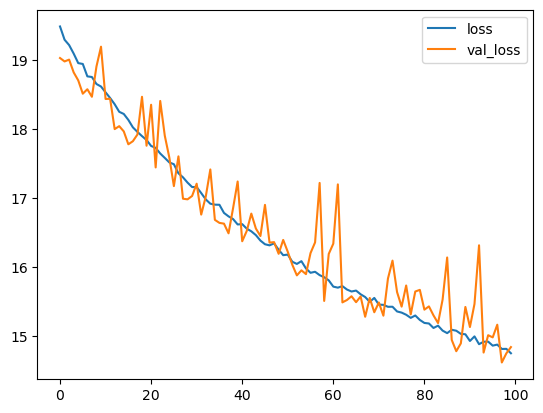

In [26]:
#storing the training and validation loss values
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


# Model Evaluation

In [27]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


15.332740305286048

# Taking inputs to predict

In [28]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [29]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()